# Soil Dataset Analysis

In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [58]:
# Define the path to the dataset
dataset_path = "../DataPreprocessing/Dataset/soil_dataset.csv"

# Load the dataset into a Pandas DataFrame
soil_df = pd.read_csv(dataset_path)

print("Initial Dataset Information:")
print(soil_df.info())

Initial Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3063 entries, 0 to 3062
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Timestamp                   2309 non-null   object 
 1   Latitude                    2309 non-null   float64
 2   Longitude                   2309 non-null   float64
 3   Location                    2309 non-null   object 
 4   Elvation                    2183 non-null   object 
 5   Soil_pH                     2309 non-null   float64
 6   Soil_moisture               2309 non-null   object 
 7   Soil_Condition              2309 non-null   object 
 8   Treatment(pH)/Ton/per/acr)  2301 non-null   object 
 9   Unnamed: 9                  0 non-null      float64
 10  Unnamed: 10                 0 non-null      float64
 11  Unnamed: 11                 1 non-null      float64
 12  Unnamed: 12                 0 non-null      float64
 13  Unna

In [59]:
# Drop unnamed columns
unnamed_columns = [col for col in soil_df.columns if 'Unnamed' in col]
soil_df = soil_df.drop(columns=unnamed_columns, axis=1)

# Display the dataset information after dropping unnamed columns
print("\nDataset Information after Dropping Unnamed Columns:")
print(soil_df.info())


Dataset Information after Dropping Unnamed Columns:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3063 entries, 0 to 3062
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Timestamp                   2309 non-null   object 
 1   Latitude                    2309 non-null   float64
 2   Longitude                   2309 non-null   float64
 3   Location                    2309 non-null   object 
 4   Elvation                    2183 non-null   object 
 5   Soil_pH                     2309 non-null   float64
 6   Soil_moisture               2309 non-null   object 
 7   Soil_Condition              2309 non-null   object 
 8   Treatment(pH)/Ton/per/acr)  2301 non-null   object 
dtypes: float64(3), object(6)
memory usage: 215.5+ KB
None


In [60]:
# Drop unnecessary columns
columns_to_drop = ['Timestamp', 'Latitude', 'Longitude', 'Location', 'Elvation', 'Treatment(pH)/Ton/per/acr)']
soil_df = soil_df.drop(columns=columns_to_drop, axis=1)

# Display the dataset information after dropping unnecessary columns
print("\nDataset Information after Dropping Unnecessary Columns:")
print(soil_df.info())


Dataset Information after Dropping Unnecessary Columns:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3063 entries, 0 to 3062
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Soil_pH         2309 non-null   float64
 1   Soil_moisture   2309 non-null   object 
 2   Soil_Condition  2309 non-null   object 
dtypes: float64(1), object(2)
memory usage: 71.9+ KB
None


In [61]:
# Remove '%' sign from 'Soil_moisture' and convert to numeric
soil_df['Soil_moisture'] = soil_df['Soil_moisture'].str.rstrip('%').astype('float') / 100.0

# Display the dataset information after converting 'Soil_moisture' to numeric
print("\nDataset Information after Converting 'Soil_moisture' to Numeric:")
print(soil_df.info())


Dataset Information after Converting 'Soil_moisture' to Numeric:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3063 entries, 0 to 3062
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Soil_pH         2309 non-null   float64
 1   Soil_moisture   2309 non-null   float64
 2   Soil_Condition  2309 non-null   object 
dtypes: float64(2), object(1)
memory usage: 71.9+ KB
None


In [62]:
soil_df.head()

,Soil_pH,Soil_moisture,Soil_Condition
0,4.8,0.78,Bad
1,6.1,0.50,Good
2,7.3,0.81,Bad
3,5.9,0.85,Bad
4,3.3,0.83,Bad


In [63]:
soil_df.isnull().sum()

Soil_pH           754
Soil_moisture     754
Soil_Condition    754
dtype: int64

In [64]:
# Drop rows with null values
soil_df = soil_df.dropna()

In [65]:
soil_df.isnull().sum()

Soil_pH           0
Soil_moisture     0
Soil_Condition    0
dtype: int64

In [66]:
soil_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2309 entries, 0 to 2308
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Soil_pH         2309 non-null   float64
 1   Soil_moisture   2309 non-null   float64
 2   Soil_Condition  2309 non-null   object 
dtypes: float64(2), object(1)
memory usage: 72.2+ KB


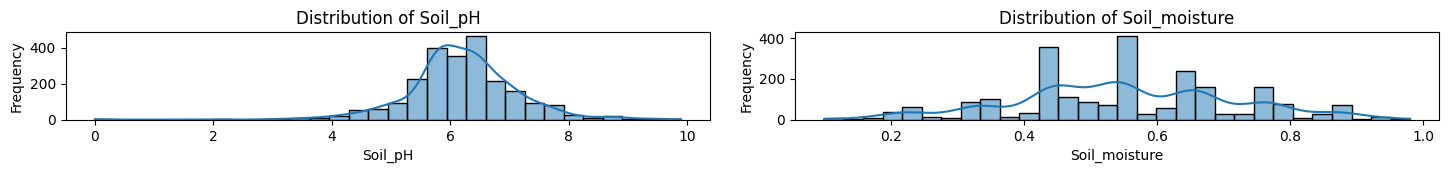

In [67]:
# Visualize the distribution of each numerical feature
numerical_features = soil_df.select_dtypes(include=[np.number]).columns

# Calculate the number of rows and columns needed for subplots
num_plots = len(numerical_features)
num_rows = (num_plots // 3) + (num_plots % 3 > 0)
num_cols = min(num_plots, 3)

# Set up subplots
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15, 2 * num_rows))
fig.tight_layout(pad=3.0)

# Flatten axes if there's only one numerical feature
axes = axes.flatten()

for i, feature in enumerate(numerical_features):
    sns.histplot(soil_df[feature], ax=axes[i], bins=30, kde=True)
    axes[i].set_title(f'Distribution of {feature}')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Frequency')

plt.show()

In [68]:
soil_df.head()

,Soil_pH,Soil_moisture,Soil_Condition
0,4.8,0.78,Bad
1,6.1,0.50,Good
2,7.3,0.81,Bad
3,5.9,0.85,Bad
4,3.3,0.83,Bad


In [69]:
# Get unique values and their counts for 'Soil_Condition'
soil_condition_counts = soil_df['Soil_Condition'].value_counts()

# Display the unique values and their counts
print("Unique Values and Counts for Soil_Condition:")
print(soil_condition_counts)

Unique Values and Counts for Soil_Condition:
Bad     1293
Good    1016
Name: Soil_Condition, dtype: int64


In [70]:
# Create a mapping dictionary
soil_condition_mapping = {'Bad': 0, 'Good': 1}

# Apply the mapping to the 'Soil_Condition' column
soil_df['Soil_Condition'] = soil_df['Soil_Condition'].map(soil_condition_mapping)

soil_df.head()

,Soil_pH,Soil_moisture,Soil_Condition
0,4.8,0.78,0
1,6.1,0.50,1
2,7.3,0.81,0
3,5.9,0.85,0
4,3.3,0.83,0


In [71]:
# Get unique values and their counts for 'Soil_Condition'
soil_condition_counts = soil_df['Soil_Condition'].value_counts()

# Display the unique values and their counts
print("Unique Values and Counts for Soil_Condition:")
print(soil_condition_counts)

Unique Values and Counts for Soil_Condition:
0    1293
1    1016
Name: Soil_Condition, dtype: int64
